In [1]:
import os
import json
import pandas as pd
import numpy as np
from Credit_Default.entity import *
from Credit_Default.constants import *
from Credit_Default.utils import *

In [2]:
from collections import namedtuple
import os
from sklearn.model_selection import StratifiedShuffleSplit
os.chdir("../")

In [3]:
pwd

'd:\\projects\\credit_default_ml_project'

In [4]:
train_df=pd.read_csv(TRAIN_FILE_PATH)
test_df=pd.read_csv(TEST_FILE_PATH)

In [5]:
train_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          24000 non-null  int64  
 1   LIMIT_BAL                   24000 non-null  float64
 2   SEX                         24000 non-null  int64  
 3   EDUCATION                   24000 non-null  int64  
 4   MARRIAGE                    24000 non-null  int64  
 5   AGE                         24000 non-null  int64  
 6   PAY_0                       24000 non-null  int64  
 7   PAY_2                       24000 non-null  int64  
 8   PAY_3                       24000 non-null  int64  
 9   PAY_4                       24000 non-null  int64  
 10  PAY_5                       24000 non-null  int64  
 11  PAY_6                       24000 non-null  int64  
 12  BILL_AMT1                   24000 non-null  float64
 13  BILL_AMT2                   240

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          6000 non-null   int64  
 1   LIMIT_BAL                   6000 non-null   float64
 2   SEX                         6000 non-null   int64  
 3   EDUCATION                   6000 non-null   int64  
 4   MARRIAGE                    6000 non-null   int64  
 5   AGE                         6000 non-null   int64  
 6   PAY_0                       6000 non-null   int64  
 7   PAY_2                       6000 non-null   int64  
 8   PAY_3                       6000 non-null   int64  
 9   PAY_4                       6000 non-null   int64  
 10  PAY_5                       6000 non-null   int64  
 11  PAY_6                       6000 non-null   int64  
 12  BILL_AMT1                   6000 non-null   float64
 13  BILL_AMT2                   6000 

In [55]:
train_df.isnull().sum().sum()

0

In [9]:
test_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
train_df['EDUCATION'].value_counts()

2    11253
1     8502
3     3888
5      216
4       92
6       39
0       10
Name: EDUCATION, dtype: int64

In [11]:
test_df['EDUCATION'].value_counts()

2    2777
1    2083
3    1029
5      64
4      31
6      12
0       4
Name: EDUCATION, dtype: int64

In [12]:
a = (train_df['EDUCATION'] == 5) | (train_df['EDUCATION'] == 6) | (train_df['EDUCATION'] == 0)
train_df.loc[a, 'EDUCATION'] = 4
b = (test_df['EDUCATION'] == 5) | (test_df['EDUCATION'] == 6) | (test_df['EDUCATION'] == 0)
test_df.loc[b, 'EDUCATION'] = 4
train_df['EDUCATION'].value_counts()

2    11253
1     8502
3     3888
4      357
Name: EDUCATION, dtype: int64

In [13]:
test_df['EDUCATION'].value_counts()

2    2777
1    2083
3    1029
4     111
Name: EDUCATION, dtype: int64

In [14]:
train_df['MARRIAGE'].value_counts()

2    12786
1    10909
3      262
0       43
Name: MARRIAGE, dtype: int64

In [15]:
test_df['MARRIAGE'].value_counts()

2    3178
1    2750
3      61
0      11
Name: MARRIAGE, dtype: int64

In [16]:
train_df.loc[(train_df['MARRIAGE'] == 0), 'MARRIAGE'] = 3
test_df.loc[(test_df['MARRIAGE'] == 0), 'MARRIAGE'] = 3
train_df['MARRIAGE'].value_counts()

2    12786
1    10909
3      305
Name: MARRIAGE, dtype: int64

In [17]:
test_df['MARRIAGE'].value_counts()

2    3178
1    2750
3      72
Name: MARRIAGE, dtype: int64

In [18]:
train_df['SEX'].value_counts()

2    14530
1     9470
Name: SEX, dtype: int64

In [19]:
test_df['SEX'].value_counts()

2    3582
1    2418
Name: SEX, dtype: int64

In [20]:
test_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [21]:
#bills=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
#pay =['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [22]:
#train_df['DUES'] = (train_df[bills].sum(axis=1)) - (train_df[pay].sum(axis=1))
#test_df['DUES'] = (test_df[bills].sum(axis=1)) - (test_df[pay].sum(axis=1))

In [23]:
train_df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,28450,50000.0,2,3,1,33,0,0,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9252,30000.0,1,2,1,39,1,2,0,0,...,28013.0,28614.0,29636.0,129.0,1456.0,1000.0,1050.0,1500.0,1505.0,0
2,27780,230000.0,2,1,2,24,-1,0,0,0,...,0.0,2000.0,987.0,7000.0,1000.0,0.0,2000.0,987.0,1951.0,0
3,4678,360000.0,2,1,1,35,-1,-1,-2,-2,...,0.0,150.0,137.0,0.0,0.0,0.0,150.0,137.0,0.0,0
4,25735,200000.0,2,1,1,46,-1,-1,-1,-1,...,5430.0,6683.0,7790.0,18031.0,3275.0,5430.0,6871.0,7790.0,8901.0,0


In [24]:
abs(train_df.corr()['default.payment.next.month']).sort_values(ascending= True)

BILL_AMT6                     0.005312
BILL_AMT5                     0.006133
BILL_AMT4                     0.010382
AGE                           0.011271
BILL_AMT3                     0.013167
BILL_AMT2                     0.013174
ID                            0.014621
BILL_AMT1                     0.019097
MARRIAGE                      0.028504
EDUCATION                     0.032912
SEX                           0.046833
PAY_AMT5                      0.052119
PAY_AMT4                      0.054156
PAY_AMT6                      0.054412
PAY_AMT3                      0.054829
PAY_AMT2                      0.055041
PAY_AMT1                      0.072375
LIMIT_BAL                     0.148157
PAY_6                         0.180157
PAY_5                         0.194040
PAY_4                         0.208685
PAY_3                         0.226864
PAY_2                         0.254476
PAY_0                         0.316101
default.payment.next.month    1.000000
Name: default.payment.nex

In [25]:
abs(test_df.corr()['default.payment.next.month']).sort_values(ascending= True)

BILL_AMT6                     0.005495
BILL_AMT4                     0.008950
BILL_AMT5                     0.009185
ID                            0.011553
SEX                           0.012684
BILL_AMT3                     0.017627
BILL_AMT2                     0.018156
BILL_AMT1                     0.021572
MARRIAGE                      0.023761
AGE                           0.024348
EDUCATION                     0.036879
PAY_AMT6                      0.048233
PAY_AMT3                      0.066212
PAY_AMT5                      0.067012
PAY_AMT4                      0.067109
PAY_AMT2                      0.074124
PAY_AMT1                      0.075598
LIMIT_BAL                     0.174342
PAY_6                         0.212894
PAY_5                         0.243683
PAY_4                         0.247351
PAY_3                         0.267920
PAY_2                         0.299134
PAY_0                         0.358860
default.payment.next.month    1.000000
Name: default.payment.nex

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

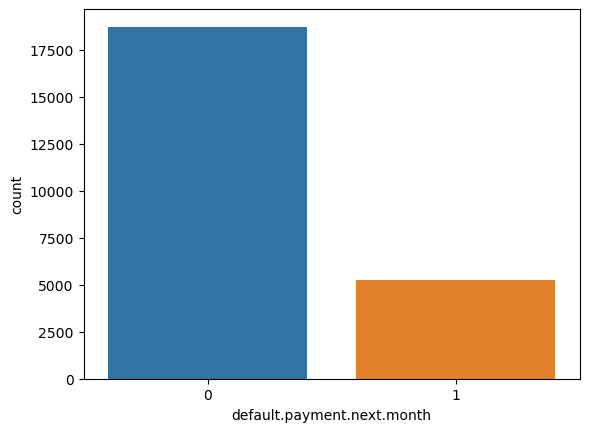

In [27]:
sns.countplot('default.payment.next.month', data = train_df)

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

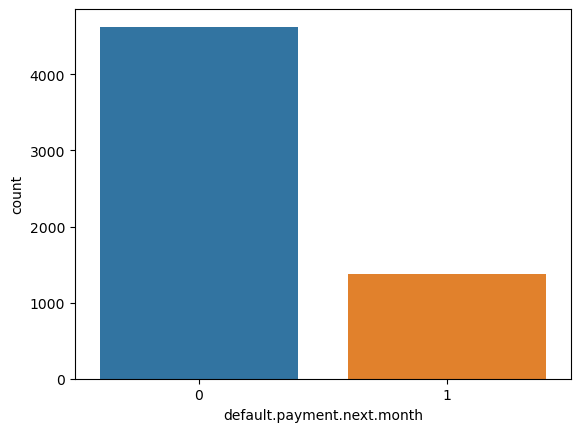

In [28]:
sns.countplot('default.payment.next.month', data = test_df)

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(train_df.iloc[:,0:-1], train_df['default.payment.next.month'])
x_test_smote, y_test_smote = smote.fit_resample(test_df.iloc[:,0:-1], test_df['default.payment.next.month'])

print('Original dataset shape', len(train_df))
print('Resampled dataset shape', len(y_train_smote))

print('Original dataset shape', len(test_df))
print('Resampled dataset shape', len(y_test_smote))

Original dataset shape 24000
Resampled dataset shape 37474
Original dataset shape 6000
Resampled dataset shape 9254


In [31]:
columns = list(train_df.columns)

In [32]:
columns.pop()

'default.payment.next.month'

In [33]:
balance_train = pd.DataFrame(x_train_smote, columns=columns)
balance_train['default.payment.next.month'] = y_train_smote
balance_test = pd.DataFrame(x_test_smote, columns=columns)
balance_test['default.payment.next.month'] = y_test_smote

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

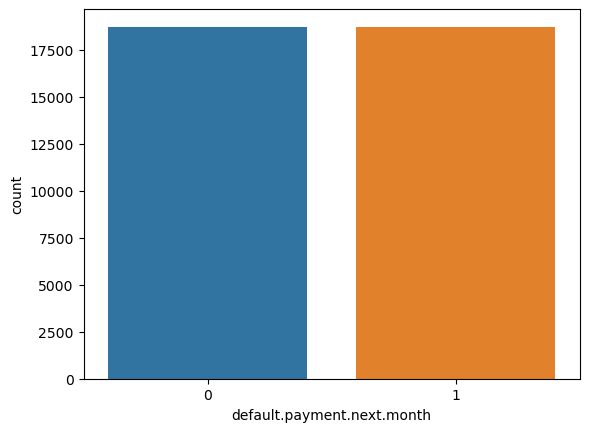

In [34]:
sns.countplot('default.payment.next.month', data = balance_train)

In [35]:
#bills=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
#pay =['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [36]:
#balance_train['DUES'] = (balance_train[bills].sum(axis=1)) - (balance_train[pay].sum(axis=1))
#balance_test['DUES'] = (balance_test[bills].sum(axis=1)) - (balance_test[pay].sum(axis=1))

In [37]:
abs(balance_train.corr()['default.payment.next.month']).sort_values(ascending= True)

AGE                           0.002621
BILL_AMT6                     0.008181
BILL_AMT5                     0.010597
BILL_AMT4                     0.016297
BILL_AMT3                     0.019473
BILL_AMT2                     0.020185
ID                            0.024154
BILL_AMT1                     0.030177
PAY_AMT5                      0.086012
PAY_AMT2                      0.087879
PAY_AMT6                      0.088521
PAY_AMT4                      0.089571
PAY_AMT3                      0.089862
EDUCATION                     0.107900
PAY_AMT1                      0.112415
LIMIT_BAL                     0.187287
PAY_6                         0.206100
MARRIAGE                      0.207689
PAY_5                         0.218208
SEX                           0.224968
PAY_4                         0.229628
PAY_3                         0.246045
PAY_2                         0.273702
PAY_0                         0.335281
default.payment.next.month    1.000000
Name: default.payment.nex

In [38]:
abs(balance_test.corr()['default.payment.next.month']).sort_values(ascending= True)

BILL_AMT6                     0.004013
BILL_AMT4                     0.009358
BILL_AMT5                     0.010197
ID                            0.010950
AGE                           0.012465
BILL_AMT3                     0.022169
BILL_AMT2                     0.022205
BILL_AMT1                     0.026485
PAY_AMT6                      0.078938
EDUCATION                     0.089398
PAY_AMT3                      0.101838
PAY_AMT5                      0.105293
PAY_AMT4                      0.110540
PAY_AMT2                      0.117791
PAY_AMT1                      0.121033
SEX                           0.182438
MARRIAGE                      0.207379
LIMIT_BAL                     0.224007
PAY_6                         0.244386
PAY_5                         0.277512
PAY_4                         0.278245
PAY_3                         0.291909
PAY_2                         0.323459
PAY_0                         0.374443
default.payment.next.month    1.000000
Name: default.payment.nex

In [39]:
balance_train.drop(['ID','AGE'], axis=1,inplace=True)
balance_test.drop(['ID','AGE'], axis=1,inplace=True)

In [40]:
balance_train.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,50000.0,2,3,1,0,0,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,30000.0,1,2,1,1,2,0,0,0,0,...,28013.0,28614.0,29636.0,129.0,1456.0,1000.0,1050.0,1500.0,1505.0,0


In [41]:
1/0

ZeroDivisionError: division by zero

In [42]:
balance_train.rename(columns={'default.payment.next.month':'DEFAULTER'},inplace=True)
balance_test.rename(columns={'default.payment.next.month':'DEFAULTER'},inplace=True)

In [43]:
balance_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULTER'],
      dtype='object')

In [44]:
cat_features=['SEX', 'EDUCATION', 'MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
num_features=[  'LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [45]:
x_train,x_test = balance_train.drop('DEFAULTER',axis=1),balance_test.drop('DEFAULTER',axis=1)
y_train,y_test = balance_train['DEFAULTER'],balance_test['DEFAULTER']

In [46]:
x_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [47]:
print(f'Training features shape :{x_train.shape}\n'
       f'Training output shape :{y_train.shape}\n'
       f'Testing features shape :{x_test.shape}\n'
       f'Testin output shape : {y_test.shape}')

Training features shape :(37474, 22)
Training output shape :(37474,)
Testing features shape :(9254, 22)
Testin output shape : (9254,)


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler


In [51]:
preprocessing = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first',sparse=False, handle_unknown='ignore'), cat_features),
    ('tnf2',StandardScaler(),num_features)],
    remainder='passthrough')

In [52]:
x_train_arr=preprocessing.fit_transform(x_train)
x_test_arr = preprocessing.transform(x_test)

In [53]:
y_train_arr= np.array(y_train)
y_test_arr= np.array(y_test)

In [54]:
train_arr= np.column_stack([x_train_arr, y_train_arr])
test_arr= np.column_stack([x_test_arr, y_test_arr])

In [ ]:
df = pd.read_csv(r"artifacts\\data_validation\\data_validated.csv")

df['Dues'] = (df['BILL_AMT_APR']+df['BILL_AMT_MAY']+df['BILL_AMT_JUN']+
            df['BILL_AMT_JUL']+df['BILL_AMT_SEPT']) - (df['PAY_AMT_APR']+ df['PAY_AMT_MAY']+
            df['PAY_AMT_JUN']+df['PAY_AMT_JUL']+df['PAY_AMT_AUG']+df['PAY_AMT_SEPT'])


cat_features=['SEX', 'EDUCATION', 'MARRIAGE','AGE']
ordinal_features=['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
num_features=['LIMIT_BAL','BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 
              'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR', 'PAY_AMT_SEPT', 
              'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']


X=df.drop('Defaulter',axis=1)
y=df['Defaulter']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=10)

print(f'Training features shape :{x_train.shape}\n'
       f'Training output shape :{y_train.shape}\n'
       f'Testing features shape :{x_test.shape}\n'
       f'Testin output shape : {y_test.shape}')

preprocessing = ColumnTransformer(transformers=[
    #('tnf1',OneHotEncoder(drop='first',sparse=False, handle_unknown='ignore'), cat_features+ordinal_features),
    ('tnf2',StandardScaler(),num_features+cat_features+ordinal_features)],
    remainder='passthrough')


x_train_arr=preprocessing.fit_transform(x_train)
x_test_arr = preprocessing.transform(x_test)


#train_arr = np.c_[ x_train_arr, np.array(y_train)]
#train_arr = np.array(x_train_arr)
y_train_arr= np.array(y_train)
#test_arr = np.c_[x_test_arr, np.array(y_test)]
#test_arr = np.array(x_test_arr)
y_test_arr= np.array(y_test)

train_arr= np.column_stack([x_train_arr, y_train_arr])
test_arr= np.column_stack([x_test_arr, y_test_arr])
path = 'artifacts/data_transformation'
os.makedirs(path)

train_file_path = os.path.join(path, "train_arr.npy")
test_file_path = os.path.join(path, "test_arr.npy")

np.save(train_file_path,train_arr)
np.save(test_file_path,test_arr)